In [113]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [114]:
df = pd.read_csv('mobile_train.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [115]:
cols = df.columns
x = np.array(df[cols[cols != 'price_range']])
y = np.array(pd.get_dummies(df['price_range']))

In [116]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.2, random_state=0)
train_x.dtype = 'float32'
test_x.dtype = 'float32'

In [117]:
train_x, train_y = tf.constant(train_x, dtype = 'float32'), tf.constant(train_y, dtype = 'float32')
test_x, test_y = tf.constant(test_x, dtype = 'float32'), tf.constant(test_y, dtype = 'float32')

In [118]:
in_features = train_x.shape[1]
out_classes = train_y.shape[1]

w = tf.Variable(tf.random.uniform([in_features, out_classes]), dtype = 'float32')
b = tf.Variable(tf.random.uniform([out_classes]))

In [119]:
def forward(x,w,b):
    out1 = tf.matmul(x,w)
    out2 = tf.add(out1,b)
    out3 = tf.nn.softmax(out2)
    return out3

In [120]:
def optimize(x,y):
    with tf.GradientTape() as tape :
        yhat = forward(train_x,w,b)
        loss = loss_object(y,yhat)
    grads = tape.gradient(loss,[w,b])
    opt.apply_gradients(zip(grads,[w,b]))
    return loss.numpy()

def accuracy(x,y,w,b):
    correct = 0
    incorrect = 0

    yhat = forward(x,w,b)
    for i in range(len(yhat)):
        if tf.math.argmax(yhat[i]) == tf.math.argmax(y[i]):
            correct += 1
        else :
            incorrect += 1

    acc = (correct / (incorrect + correct)) * 100
    return acc

In [129]:
epochs = 2000
loss_values = []
acc_values = []

lr = 0.1
loss_object = tf.keras.losses.CategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(lr)


for epoch in range(epochs):
    loss = optimize(train_x,train_y)
    loss_values.append(loss)

    acc = accuracy(test_x,test_y,w,b)
    acc_values.append(acc)

    if epoch % (epochs/20) == 0 :
        print('Epoch : ', epoch)
        print(f'Loss : {loss} | Accuracy : {acc}')
        print('-' * 50)

Epoch :  0
Loss : 6.289018630981445 | Accuracy : 44.25
--------------------------------------------------
Epoch :  100
Loss : 6.282603740692139 | Accuracy : 44.25
--------------------------------------------------
Epoch :  200
Loss : 6.276769638061523 | Accuracy : 44.5
--------------------------------------------------
Epoch :  300
Loss : 6.271425724029541 | Accuracy : 44.75
--------------------------------------------------
Epoch :  400
Loss : 6.266498565673828 | Accuracy : 45.25
--------------------------------------------------
Epoch :  500
Loss : 6.261932373046875 | Accuracy : 45.5
--------------------------------------------------
Epoch :  600
Loss : 6.257679462432861 | Accuracy : 45.75
--------------------------------------------------
Epoch :  700
Loss : 6.253702163696289 | Accuracy : 46.0
--------------------------------------------------
Epoch :  800
Loss : 6.249969005584717 | Accuracy : 46.25
--------------------------------------------------
Epoch :  900
Loss : 6.24645137786

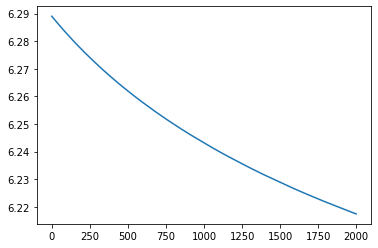

In [130]:
plt.plot(loss_values)